<a href="https://colab.research.google.com/github/SOUMEE2000/Machine-Learning-Stash/blob/main/Image%20Processing%20Basics/%20Dendritic_spine_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model 1**

In [ ]:
from keras.layers import *
from keras.models  import *
from keras.optimizers import *
import keras.backend as K
import numpy as np 
import os
import skimage.io as io

In [ ]:
import tensorflow as tf


IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
#c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
#c1 = tf.keras.layers.Dropout(0.1)(c1)
#c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
#p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)

c5_n = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c5_n = tf.keras.layers.Dropout(0.3)(c5_n)
c5_n = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5_n)


#Expansive path 
u6_n = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5_n)
u6_n = tf.keras.layers.concatenate([u6_n, c5])
c6_n = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6_n)
c6_n = tf.keras.layers.Dropout(0.2)(c6_n)
c6_n = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6_n)
 

u6 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
 
#u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
#u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
#c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u9)
#c9 = tf.keras.layers.Dropout(0.1)(c9)
#c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c8)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
adam = Adam(0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

  

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.load_weights("/content/drive/MyDrive/Copy of iris_train_weights.h5")

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/DRIVE.zip"
with ZipFile(file_name,'r') as zipf:
  zipf.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/Modified_drive.zip"
with ZipFile(file_name,'r') as zipf:
  zipf.extractall()
  print('finish')

finish


In [ ]:
import os

import cv2
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
#import  scipy.misc.pilutil
data_location = ''

training_loc= "/content/Modified_drive/"
training_label_loc= "/content/DRIVE/training/1st_manual/"
#training_loc_mask= "/content/DRIVE/training/mask/"

training_images= os.listdir(training_loc)
training_labels= os.listdir(training_label_loc)
#training_masks= os.listdir(training_loc_mask)

training_images.sort()
training_labels.sort()

train_data = []
train_label = []
desired_size = 256

In [ ]:
def changing_intensity(img):
  for i in range(len(img)):
    for j in range(len(img)):
      if img[i][j] > 201:
        img[i][j] = 0
  
  return img

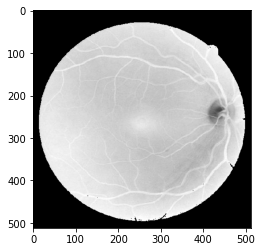

In [ ]:
 for i in training_images:
    im = plt.imread(training_loc + i)
    im = np.array(im)
    im =  changing_intensity(im)
    plt.imshow(im, cmap ="gray")
    #plt.imsave( "/content/test/" + str(i) + ".png", im)
    label = plt.imread(training_label_loc + i.split('_')[0] + '_manual1.gif')
    train_data.append(cv2.resize(im, (desired_size, desired_size)))
    temp = cv2.resize(label, (desired_size, desired_size))
    train_label.append(temp)

In [ ]:
np.array(train_label).shape

(20, 256, 256)

In [ ]:
train_label = np.array(train_label)
train_label = np.reshape(train_label, (20,desired_size, desired_size,1))

In [ ]:
train_data = np.array(train_data)

x_train = train_data.astype('float32') / 255.
y_train = train_label.astype('float32')/255

In [ ]:
model.fit( x_train, y_train, steps_per_epoch=20, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 57ms/step - loss: 0.0373 - accuracy: 0.9326
Epoch 2/1000
20/20 [==============================] - 1s 54ms/step - loss: 0.0373 - accuracy: 0.9326
Epoch 3/1000
20/20 [==============================] - 1s 55ms/step - loss: 0.0371 - accuracy: 0.9326
Epoch 4/1000
20/20 [==============================] - 1s 54ms/step - loss: 0.0371 - accuracy: 0.9326
Epoch 5/1000
20/20 [==============================] - 1s 54ms/step - loss: 0.0374 - accuracy: 0.9326
Epoch 6/1000
20/20 [==============================] - 1s 55ms/step - loss: 0.0382 - accuracy: 0.9326
Epoch 7/1000
20/20 [==============================] - 1s 54ms/step - loss: 0.0388 - accuracy: 0.9326
Epoch 8/1000
20/20 [==============================] - 1s 55ms/step - loss: 0.0488 - accuracy: 0.9315
Epoch 9/1000
20/20 [==============================] - 1s 54ms/step - loss: 0.0648 - accuracy: 0.9295
Epoch 10/1000
20/20 [==============================] - 1s 54ms/step - loss: 2.4802 - accura

In [ ]:
import math
def spilt_imgs(img, res=512):
    n = 256
    zrs = np.zeros((res,res))
    h,w = img.shape
    zrs[:h,:w] += img
    nums = int(res/n)
    imgs = []
    for i in range(nums):
        for j in range(nums):
            imgs.append(zrs[i*n:(i+1)*n,j*n:(j+1)*n])
    return np.array(imgs)

In [ ]:
def stitch_imgs(imgs):
    n = 256
    nums = int(math.sqrt(len(imgs)))
    dims = nums*imgs.shape[1]
    zrs = np.zeros((dims,dims))
    cnt = 0
    for i in range(nums):
        for j in range(nums):
            zrs[i*n:(i+1)*n,j*n:(j+1)*n] += imgs[cnt]
            cnt+=1
    return zrs
#splits = spilt_imgs(img_pred)
#img2 = stitch_imgs(splits)

# **Sanity Checks**

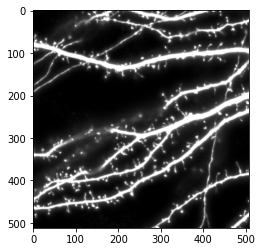

In [ ]:
test_images_loc = "/content/drive/MyDrive/09112015_5-CT2_czas_przed_do _20(3rd)/A"

test_files= os.listdir(test_images_loc)
test_files.sort()
img_path = test_images_loc + "/" + test_files[0]
img = plt.imread(img_path)
plt.imshow(img)

In [ ]:
img[:, :, 0].shape

(512, 508)

In [ ]:
test_images_loc = "/content/drive/MyDrive/09112015_5-CT2_czas_przed_do _20(3rd)/A"

test_files= os.listdir(test_images_loc)
test_files.sort()
test_data=[]
for i in test_files:
  test_im= plt.imread(test_images_loc + '/' + i)
  #test_data.append(test_im[100:356 , 500:756])
  test_data.append(cv2.resize(test_im[:, :, 0],(desired_size, desired_size)))

test_data= np.array(test_data)
print(test_data.shape)
x_test = test_data
x_test = np.reshape(x_test, (len(x_test), desired_size, desired_size, 1))  # adapt this if using `channels_first` image data format
y_pred= model.predict(x_test)

(6, 256, 256)


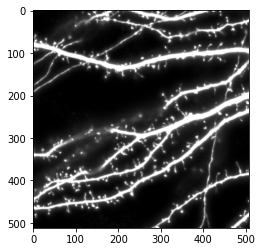

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread("/content/drive/MyDrive/09112015_5-CT2_czas_przed_do _20(3rd)/A/MAX_09112015_5-CT2_czas_przed_do_20-0013.png")
plt.imshow(im)
img_array = spilt_imgs(im[:, :, 0]) 

In [ ]:
y_pred = model.predict(img_array)
y_pred.shape

(4, 256, 256, 1)

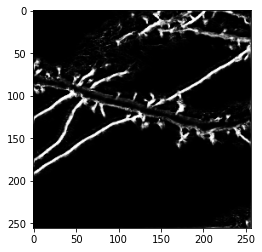

In [ ]:
plt.imshow(y_pred[0,...,0],cmap ="gray")

In [ ]:
im = stitch_imgs(y_pred[...,0])

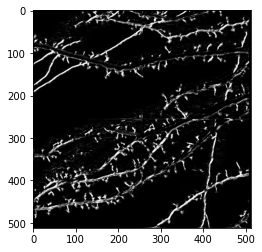

In [ ]:
plt.imshow(im, cmap ="gray")

In [ ]:
plt.imsave("/content/img.png", im, cmap ="gray")

In [ ]:
im.shape

(512, 512)

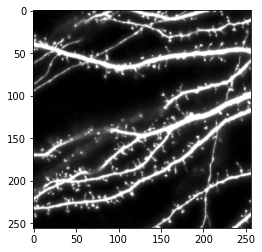

In [ ]:
plt.imshow(x_test[1,...,0], cmap ="gray")

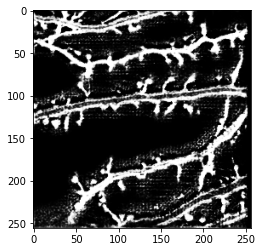

In [ ]:
plt.imshow(y_pred[1,...,0], cmap = "gray")

In [ ]:
y_pred.max()

0.003128313

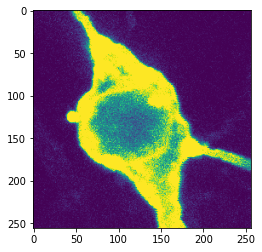

In [ ]:
test_img = plt.imread("/content/CELL_1_whole_cell_ca1 mysz 20.png")
plt.imshow(test_img[100:356 , 500:756])

In [ ]:
test_img_part = test_img[100:356 , 500:756]
test_img_part_ex = np.expand_dims(test_img_part,axis=0)
test_img_part_ex = np.expand_dims(test_img_part_ex,axis=3)
test_img_pred = model.predict(test_img_part_ex)

In [ ]:
test_img_pred.shape

(1, 256, 256, 1)

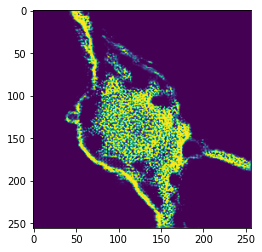

In [ ]:
plt.imshow(test_img_pred[0,...,0])

In [ ]:
y_pred = model.predict()

In [ ]:
#test_images_loc='/content/DRIVE/test/test/images'

#test_files= os.listdir(test_images_loc)
#test_files.sort()
#test_data=[]
#for i in test_files:
#  test_im= plt.imread('/content/DRIVE/test/test/images/' + i)
#  test_data.append(cv2.resize(test_im,(desired_size, desired_size)))

#test_data= np.array(test_data)
#x_test = test_data/ 255.
#x_test = np.reshape(x_test, (len(x_test), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
#y_pred= model.predict(x_test)

In [ ]:
y_pred.shape

(20, 256, 256, 1)

In [ ]:
test_files

['01_test.tif',
 '02_test.tif',
 '03_test.tif',
 '04_test.tif',
 '05_test.tif',
 '06_test.tif',
 '07_test.tif',
 '08_test.tif',
 '09_test.tif',
 '10_test.tif',
 '11_test.tif',
 '12_test.tif',
 '13_test.tif',
 '14_test.tif',
 '15_test.tif',
 '16_test.tif',
 '17_test.tif',
 '18_test.tif',
 '19_test.tif',
 '20_test.tif']

# **Predictions**

In [ ]:
test_images_loc = "/content/drive/MyDrive/09112015_5-CT2_czas_przed_do _20(3rd)/C"

test_files= os.listdir(test_images_loc)
test_files.sort()
test_data=[]
count = 0

for i in test_files:
  test_im= plt.imread(test_images_loc + '/' + i)
  img_array = spilt_imgs(test_im[:, :, 0]) 
  y_pred = model.predict(img_array)
  im = stitch_imgs(y_pred[...,0])
  path="/content/C/"+ str(test_files[count])
  cv2.imwrite(str(path),im*255)                    # img*255 is important for cv2 to save the image properly.
  count = count+1 

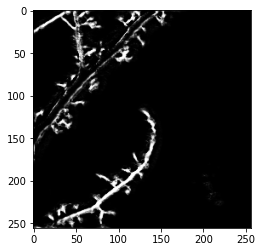

In [ ]:
from PIL import Image 
i=0
for img in y_pred:
  #arr= np.array(img)
  img= np.reshape(img, (256, 256))
  #img= Image.fromarray(arr)
  plt.imshow(img, cmap="gray")
  path="/content/C1/"+ str(test_files[i])
  cv2.imwrite(str(path),img*255)                    # img*255 is important for cv2 to save the image properly.
  i= i+1

In [ ]:
from google.colab import files

loc_A = "/content/Labels/C"
loc_files = os.listdir(loc_A)
for i in loc_files:
  files.download(loc_A + "/" + i) 

In [ ]:
train_data = []
train_label = []
desired_size = 256

training_loc =  "/content/drive/MyDrive/09112015_5-CT2_czas_przed_do _20(3rd)/"
training_label_loc = "/content/Labels/"

train_A =  os.listdir(training_loc + "A")
train_B =  os.listdir(training_loc + "B")
train_C =  os.listdir(training_loc + "C")

label_A =  os.listdir(training_label_loc + "A")
label_B =  os.listdir(training_label_loc + "B")
label_C =  os.listdir(training_label_loc + "C")

train_A.sort()
train_B.sort()
train_C.sort()
label_A.sort()
label_A.sort()
label_A.sort()

for i in range(6):
  im = plt.imread(training_loc + "A/" + train_A[i])
  train_data.append(cv2.resize(im[:,:,0], (desired_size, desired_size)))
  im = plt.imread(training_loc + "B/" + train_B[i])
  train_data.append(cv2.resize(im[:, :, 0], (desired_size, desired_size)))
  im = plt.imread(training_loc + "C/" + train_C[i])
  train_data.append(cv2.resize(im[:,:, 0], (desired_size, desired_size)))

  label = plt.imread(training_label_loc + "A/" + label_A[i])
  train_label.append(cv2.resize(label, (desired_size, desired_size)))
  label = plt.imread(training_label_loc + "B/" + label_B[i])
  train_label.append(cv2.resize(label, (desired_size, desired_size)))
  label = plt.imread(training_label_loc + "C/" + label_C[i])
  train_label.append(cv2.resize(label, (desired_size, desired_size)))

In [ ]:
img = plt.imread(training_loc + "A/" + train_A[i])
img.max()

1.0

In [ ]:
train_label[0].shape

(256, 256)

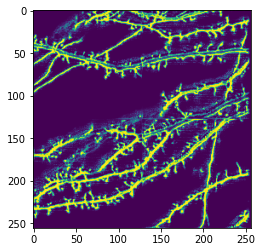

In [ ]:
plt.imshow(train_label[0])

In [ ]:
np.array(train_data).shape

(18, 256, 256)

In [ ]:
train_data = np.array(train_data)
train_label = np.array(train_label)
train_data = np.reshape(train_data,(18, 256, 256, 1))
train_label = np.reshape(train_label,(18, 256, 256, 1))

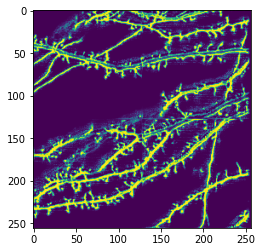

In [ ]:
plt.imshow(train_label[0,...,0])

In [ ]:
model.fit( train_data, train_label, batch_size = 3, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 5s 135ms/step - loss: 0.2345 - accuracy: 0.5954
Epoch 2/1000
6/6 [==============================] - 1s 134ms/step - loss: 0.1890 - accuracy: 0.5968
Epoch 3/1000
6/6 [==============================] - 1s 134ms/step - loss: 0.1806 - accuracy: 0.5974
Epoch 4/1000
6/6 [==============================] - 1s 135ms/step - loss: 0.1770 - accuracy: 0.5975
Epoch 5/1000
6/6 [==============================] - 1s 134ms/step - loss: 0.1742 - accuracy: 0.5977
Epoch 6/1000
6/6 [==============================] - 1s 136ms/step - loss: 0.1723 - accuracy: 0.5977
Epoch 7/1000
6/6 [==============================] - 1s 135ms/step - loss: 0.1708 - accuracy: 0.5977
Epoch 8/1000
6/6 [==============================] - 1s 135ms/step - loss: 0.1700 - accuracy: 0.5978
Epoch 9/1000
6/6 [==============================] - 1s 137ms/step - loss: 0.1694 - accuracy: 0.5980
Epoch 10/1000
6/6 [==============================] - 1s 135ms/step - loss: 0.1692 - accuracy: 0.5980

KeyboardInterrupt: ignored

In [ ]:
model.save("content/weights.h5")

/content/drive/MyDrive/09112015_5-CT_czas_przed_0(2nd)/A/MAX_09112015_5-CT_czas_przed_0-0001.png
(512, 512)
0.9952585101127625
/content/drive/MyDrive/09112015_5-CT_czas_przed_0(2nd)/A/MAX_09112015_5-CT_czas_przed_0-0002.png
(512, 512)
0.9969152212142944
/content/drive/MyDrive/09112015_5-CT_czas_przed_0(2nd)/A/MAX_09112015_5-CT_czas_przed_0-0003.png
(512, 512)
0.9962924122810364


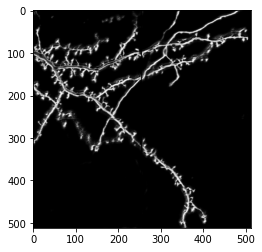

In [ ]:
test_images_loc = "/content/drive/MyDrive/09112015_5-CT_czas_przed_0(2nd)/A"

test_files= os.listdir(test_images_loc)
test_files.sort()
test_data=[]
count = 0

for i in test_files:
  test_im= plt.imread(test_images_loc + '/' + i)
  print(test_images_loc + '/' + i)
  img_array = spilt_imgs(test_im[:, :, 0]) 
  y_pred = model.predict(img_array)
  im = stitch_imgs(y_pred[...,0])
  path="/content/A1/"+ str(test_files[count])
  cv2.imwrite(str(path),im*255)                    # img*255 is important for cv2 to save the image properly.
  plt.imshow(im, cmap ="gray")
  print(im.shape)
  print(im.max())
  count = count+1 

1.0


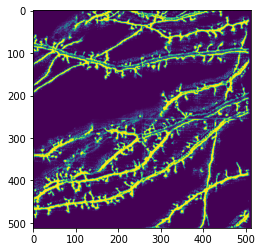

In [ ]:
im_train_label = plt.imread("/content/Labels/A/MAX_09112015_5-CT2_czas_przed_do_20-0013.png")
plt.imshow(im_train_label)
print(im_train_label.max())

# **Model 2**

In [ ]:
  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, concatenate

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
conv1 =    Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
conv2 =    Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool4))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

model = tf.keras.Model(inputs=inputs, outputs=conv10)

model.compile(optimizer = Adam(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit( x_train, y_train, steps_per_epoch=100, epochs=1000)

Epoch 1/1000
100/100 [==============================] - 9s 80ms/step - loss: 65122995273728.0000 - accuracy: 0.8795
Epoch 2/1000
100/100 [==============================] - 8s 79ms/step - loss: 0.2701 - accuracy: 0.8795
Epoch 3/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2691 - accuracy: 0.8795
Epoch 4/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2670 - accuracy: 0.8795
Epoch 5/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2659 - accuracy: 0.8795
Epoch 6/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2648 - accuracy: 0.8795
Epoch 7/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2643 - accuracy: 0.8795
Epoch 8/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2630 - accuracy: 0.8795
Epoch 9/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2623 - accuracy: 0.8795
Epoch 10/1000
100/100 [==============================] - 8s 

KeyboardInterrupt: ignored

In [ ]:
!zip -r /content/file.zip /content/Ex vivo-Adjusted and resized-MOUSE 20 ca1-Adjusted_ Resized_

	zip warning: name not matched: /content/Ex
	zip warning: name not matched: vivo-Adjusted
	zip warning: name not matched: and
	zip warning: name not matched: resized-MOUSE
	zip warning: name not matched: 20
	zip warning: name not matched: ca1-Adjusted_
	zip warning: name not matched: Resized_

zip error: Nothing to do! (try: zip -r /content/file.zip . -i /content/Ex vivo-Adjusted and resized-MOUSE 20 ca1-Adjusted_ Resized_)


In [ ]:
to gray
invert
white->black

In [ ]:
from google.colab import files
files.download("/content/file.zip")